In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
import math

In [2]:
directory = "./data/"

### Countries to exclude

In [4]:
to_keep = pd.read_excel(directory+"to_keep.xlsx")
cnt_keep = list(to_keep.Country)
len(cnt_keep)

115

### Facebook data

In [5]:
df_fr = pd.read_excel(directory+"fractions.xlsx")
df_fr = df_fr[df_fr['Unnamed: 0'].isin(cnt_keep)]
df_fr.set_index('Unnamed: 0', inplace=True)
df_fr.head()

,Sep-veg-dau,Sep-veg-mau,Jan-veg-dau,Jan-veg-mau,Jan-vegan-dau,Jan-vegan-mau,Jan-semi-dau,Jan-semi-mau,Jan-sus-dau,Jan-sus-mau
Unnamed: 0,,,,,,,,,,
Afghanistan,NaN,NaN,0.019068,0.011765,0.120306,0.076471,0.000642,0.000294,0.002961,0.002265
Albania,NaN,NaN,0.087694,0.072500,0.149703,0.125000,0.001017,0.000833,0.003718,0.003167
Algeria,NaN,NaN,0.027133,0.018500,0.101863,0.070000,0.000088,0.000050,0.004166,0.002850
Angola,NaN,NaN,0.027543,0.015000,0.064264,0.034000,0.000000,0.000500,0.000726,0.000500
Argentina,0.117026,0.101321,0.118802,0.103448,0.206825,0.179310,0.000038,0.000034,0.001972,0.002310


In [6]:
df_fr.shape

(115, 10)

### Survey data

In [7]:
df_w = pd.read_excel(directory+'Surveys_vegetarians.xlsx', sheet_name='Sheet1')

df_w = df_w[['Country', 'Updated figure', 'FLEXITARIAN', 'Data set year']]
df_w['Country'] = df_w['Country'].str.strip()
df_w = df_w.set_index('Country')
df_w.columns = ['Vegetarian-Survey', 'Flexitarian-Survey', 'Dataset']
df_w.head()
#df_w = df_w.dropna(how='all')

,Vegetarian-Survey,Flexitarian-Survey,Dataset
Country,,,
Argentina,0.050,NaN,2017
Australia,0.121,NaN,2018
Austria,0.070,NaN,2013
Belgium,0.070,0.09,2018
Brazil,0.140,NaN,2018


### Google Trends data

In [8]:
df_gt = pd.read_excel(directory+'GoogleTrends/data/Global_byregion_topic_v2.xlsx')
df_gt = df_gt[df_gt['geoName'].isin(cnt_keep)]

df_gt.set_index('geoName', inplace=True)
df_gt.head()

,Vegetarianism,Sustainable diet,Sustainable lifestyles,Sustainable living,Plant-based diet
geoName,,,,,
Afghanistan,0,0,0,0,0
Albania,0,0,0,0,0
Algeria,0,0,0,0,0
Angola,0,0,0,0,0
Argentina,12,0,0,0,0


### FAO meat

In [9]:
df = pd.read_excel(directory+"AllData_Aggregate.xlsx")
df = df[df['Unnamed: 0'].isin(cnt_keep)]

df.set_index('Unnamed: 0', inplace=True)

df_meat = df[['Meat_2017', 'Meat_2016', 'Meat_2015', 'Meat_2014']]
df_meat = df_meat.dropna()
df_meat['avg_meat'] = df_meat[['Meat_2017', 'Meat_2016', 'Meat_2015', 'Meat_2014']].mean(axis=1)

df_meat['m_14_15'] = (df_meat['Meat_2015'] - df_meat['Meat_2014'])/df_meat['Meat_2014']
df_meat['m_15_16'] = (df_meat['Meat_2016'] - df_meat['Meat_2015'])/df_meat['Meat_2015']
df_meat['m_16_17'] = (df_meat['Meat_2017'] - df_meat['Meat_2016'])/df_meat['Meat_2016']
df_meat['avg_d_meat'] = df_meat[['m_14_15', 'm_15_16', 'm_16_17']].mean(axis=1)



### Figure 3 with change in meat consumption

C:\Users\sibel\Anaconda3\lib\site-packages\matplotlib\figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "
C:\Users\sibel\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\sibel\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\sibel\Anaconda3\lib\site-package

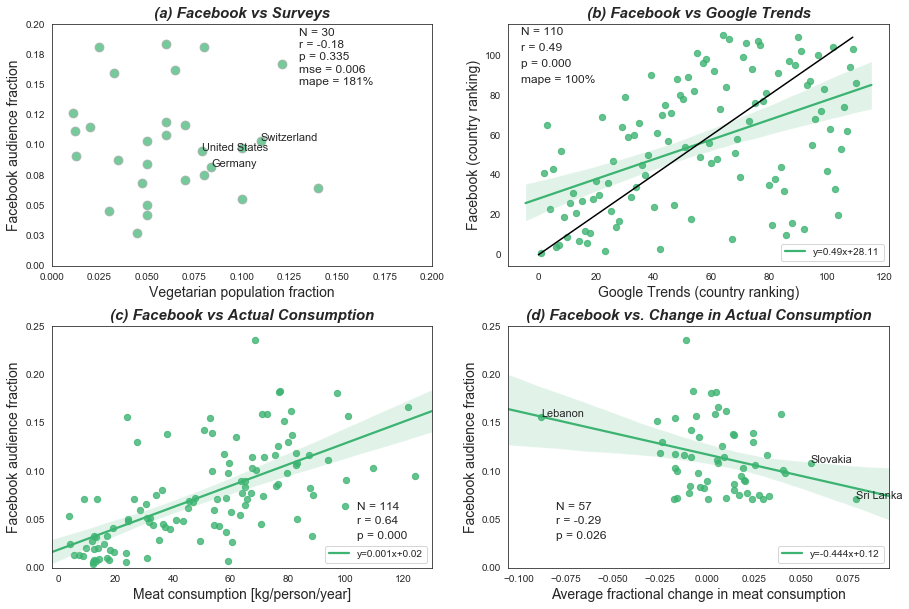

In [19]:
sns.set_style("white")
from matplotlib.ticker import FormatStrFormatter
from matplotlib.gridspec import GridSpec

#fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, sharey=False, sharex=False)

fig = plt.figure(constrained_layout=True)

gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

fig.set_figwidth(15)
fig.set_figheight(10)
plt.subplots_adjust(wspace=.2)
plt.subplots_adjust(hspace=.25)
#ax1.set_aspect('equal', 'box')
#ax2.set_aspect('equal', 'box')
#ax3.set_aspect('equal', 'box')

# === a ===
df_plota = pd.concat([df_fr['Jan-veg-mau'], df_w['Vegetarian-Survey']], ignore_index=True, axis=1)
df_plota = df_plota.dropna()
df_plota.columns = ['Facebook', 'Surveys']

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df_plota["Facebook"],
                                                               df_plota['Surveys'])


ax1.scatter(x=df_plota["Surveys"], y=df_plota["Facebook"], color='mediumseagreen', alpha=0.7, s=80, edgecolor='darkgrey')

ax1.set_ylabel("Facebook audience fraction", fontsize=14)
ax1.set_xlabel("Vegetarian population fraction", fontsize=14)

mse = mean_squared_error(df_plota['Facebook'], df_plota['Surveys'])
d = abs(df_plota['Facebook']-df_plota['Surveys'])/df_plota['Surveys']
mape = 100*d.mean()
n = df_plota.shape[0]

ax1.annotate("N = {0:.0f}".format(n), (0.13, 0.19), fontsize=12)
ax1.annotate("r = {0:.2f}".format(r_value), (0.13, 0.18), fontsize=12)
ax1.annotate("p = {0:.3f}".format(p_value), (0.13, 0.17), fontsize=12)
ax1.annotate("mse = {0:.3f}".format(mse), (0.13, 0.16), fontsize=12)
ax1.annotate("mape = {0:.0f}%".format(mape), (0.13, 0.15), fontsize=12)

ax1.set_ylim([0, 0.2])
ax1.set_xlim([0, 0.2])
for index, row in df_plota.iterrows():
    if index in ['United States', 'Germany', 'Switzerland']:
        x = row['Surveys']
        y = row['Facebook']
        ax1.annotate(index, (x, y), fontsize=11)
ax1.set_title("(a) Facebook vs Surveys", fontsize=15, style='italic', weight='bold')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# === b ===
df_plotb = pd.concat([df_fr['Jan-veg-mau'], df_gt['Vegetarianism']], ignore_index=True, axis=1)
df_plotb = df_plotb.dropna()
df_plotb.columns = ['Facebook', 'Google_Trends']
df_plotb['fb_rank'] = df_plotb['Facebook'].rank(method='first', ascending=False)
df_plotb['gt_rank'] = df_plotb['Google_Trends'].rank(method='first', ascending=False)

slope, intercept, r_value, p_value, std_err = stats.linregress(df_plotb['gt_rank'],
                                                               df_plotb["fb_rank"])


#ax2.scatter(x=df_plotb["gt_rank"], y=df_plotb["fb_rank"], color='green', alpha=0.7, s=120, edgecolor='darkgrey')
ax2 = sns.regplot(x="gt_rank", y="fb_rank", data=df_plotb, ax=ax2, color='mediumseagreen',
                  line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)},
                 scatter_kws={'s' : 40})

ax2.set_ylabel("Facebook (country ranking)", fontsize=14)
ax2.set_xlabel("Google Trends (country ranking)", fontsize=14)

d = abs(df_plotb['fb_rank']-df_plotb['gt_rank'])/df_plotb['gt_rank']
mape = 100*d.mean()
n = df_plotb.shape[0]
x = list(range(n)) 
ax2.plot(x, x, c='black')
ax2.legend(loc='lower right')
ax2.annotate("N = {0:.0f}".format(n), (-6, 110), fontsize=12)
ax2.annotate("r = {0:.2f}".format(r_value), (-6, 102), fontsize=12)
ax2.annotate("p = {0:.3f}".format(p_value), (-6, 94), fontsize=12)
ax2.annotate("mape = {0:.0f}%".format(mape), (-6, 86), fontsize=12)

ax2.set_title("(b) Facebook vs Google Trends", fontsize=15, style='italic', weight='bold')


# === c ===
df_plotc = pd.concat([df_fr['Jan-veg-mau'], df_meat['Meat_2017']], ignore_index=True, axis=1)
df_plotc = df_plotc.dropna()
df_plotc.columns = ['Facebook', 'FAO']
#only high consumption:
#df_plotc = df_plotc[df_plotc['FAO']>=df_plotc['FAO'].median()]

slope, intercept, r_value, p_value, std_err = stats.linregress(df_plotc["FAO"].values,
                                                               df_plotc['Facebook'].values
                                                              )


#ax2.scatter(x=df_plotb["gt_rank"], y=df_plotb["fb_rank"], color='green', alpha=0.7, s=120, edgecolor='darkgrey')
ax3 = sns.regplot(x="FAO", y="Facebook", data=df_plotc, ax=ax3, color='mediumseagreen',
                  line_kws={'label':"y={0:.3f}x+{1:.2f}".format(slope,intercept)},
                  scatter_kws={'s' : 40})

ax3.set_ylabel("Facebook audience fraction", fontsize=14)
ax3.set_xlabel("Meat consumption [kg/person/year]", fontsize=14)

d = abs(df_plotc['Facebook']-df_plotc['FAO'])/df_plotc['FAO']
mape = 100*d.mean()
n = df_plotc.shape[0]

ax3.annotate("N = {0:.0f}".format(n), (104, 0.06), fontsize=12)
ax3.annotate("r = {0:.2f}".format(r_value), (104, 0.045), fontsize=12)
ax3.annotate("p = {0:.3f}".format(p_value), (104, 0.03), fontsize=12)
ax3.legend(loc='lower right')

#ax3.set_xlim([40, 130])
ax3.set_ylim([0, 0.25])

ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax3.set_title("(c) Facebook vs Actual Consumption", fontsize=15, style='italic', weight='bold')


# ==== d ====
df_plotd = pd.concat([df_fr['Jan-veg-mau'], df_meat['avg_d_meat']], ignore_index=True, axis=1)
df_plotd = df_plotd.dropna()
df_plotd.columns = ['Facebook', 'FAO']
df_plotd = df_plotd[df_plotd['Facebook']>=df_plotd['Facebook'].median()]

#df_plot = df_meat[df_meat['FB_veg_fraction']>=df_meat['FB_veg_fraction'].median()]

#df_plotd['FAO'] = df_plotd['FAO']*100 

slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(df_plotd["FAO"].values,
                                                               df_plotd['Facebook'].values
                                                              )
ax4 = sns.regplot(x="FAO", y="Facebook", data=df_plotd, ax=ax4, color='mediumseagreen',
                  line_kws={'label':"y={0:.3f}x+{1:.2f}".format(slope3,intercept3)},
                  scatter_kws={'s' : 40})

ax4.set_ylabel("Facebook audience fraction", fontsize=14)
ax4.set_xlabel("Average fractional change in meat consumption", fontsize=14)
ax4.set_title("(d) Facebook vs. Change in Actual Consumption", fontsize=15, style='italic', weight='bold')
ax4.legend(loc='lower right')
n = df_plotd.shape[0]
ax4.annotate("N = {0:.0f}".format(n), (-0.08, 0.06), fontsize=12)
ax4.annotate("r = {0:.2f}".format(r_value3), (-0.08, 0.045), fontsize=12)
ax4.annotate("p = {0:.3f}".format(p_value3), (-0.08, 0.03), fontsize=12)
ax4.set_ylim([0, 0.25])

for index, row in df_plotd.iterrows():
    if row['FAO']<=-0.05 or row['FAO']>0.05 :
        x = row['FAO']
        y = row['Facebook']
        ax4.annotate(index, (x, y), fontsize=11)

plt.savefig(directory+"Figure2_withdeltameat_highFBcountries.png", dpi=600, bbox_inches='tight')
plt.show()


C:\Users\sibel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


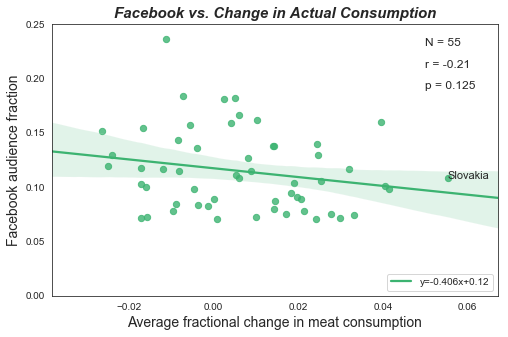

In [23]:
# ==== d ====
fig, ax4 = plt.subplots()

fig.set_figwidth(8)
fig.set_figheight(5)

df_plotd = pd.concat([df_fr['Jan-veg-mau'], df_meat['avg_d_meat']], ignore_index=True, axis=1)
df_plotd = df_plotd.dropna()
df_plotd.columns = ['Facebook', 'FAO']
df_plotd = df_plotd[df_plotd['Facebook']>=df_plotd['Facebook'].median()]
df_plotd = df_plotd.drop(['Lebanon', 'Sri Lanka'], axis='index')

#df_plot = df_meat[df_meat['FB_veg_fraction']>=df_meat['FB_veg_fraction'].median()]

#df_plotd['FAO'] = df_plotd['FAO']*100 

slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(df_plotd["FAO"].values,
                                                               df_plotd['Facebook'].values
                                                              )
ax4 = sns.regplot(x="FAO", y="Facebook", data=df_plotd, ax=ax4, color='mediumseagreen',
                  line_kws={'label':"y={0:.3f}x+{1:.2f}".format(slope3,intercept3)},
                  scatter_kws={'s' : 40})

ax4.set_ylabel("Facebook audience fraction", fontsize=14)
ax4.set_xlabel("Average fractional change in meat consumption", fontsize=14)
ax4.set_title("Facebook vs. Change in Actual Consumption", fontsize=15, style='italic', weight='bold')
ax4.legend(loc='lower right')
n = df_plotd.shape[0]
ax4.annotate("N = {0:.0f}".format(n), (0.05, 0.23), fontsize=12)
ax4.annotate("r = {0:.2f}".format(r_value3), (0.05, 0.21), fontsize=12)
ax4.annotate("p = {0:.3f}".format(p_value3), (0.05, 0.19), fontsize=12)
ax4.set_ylim([0, 0.25])

for index, row in df_plotd.iterrows():
    if row['FAO']<=-0.05 or row['FAO']>0.05 :
        x = row['FAO']
        y = row['Facebook']
        ax4.annotate(index, (x, y), fontsize=11)

plt.savefig(directory+"Figure2d_outlierremoved.png", dpi=600, bbox_inches='tight')
plt.show()

# DELTA MEAT (Supp Figure)

In [10]:
df_meat['FB_veg_fraction'] = df_fr['Jan-veg-mau']
df_meat = df_meat[df_meat['FB_veg_fraction'].notna()]

In [11]:
df_meat = df_meat.dropna()

In [12]:
df_meat.shape

(114, 10)

In [14]:
sns.set_style("white")
from matplotlib.ticker import FormatStrFormatter
from matplotlib.gridspec import GridSpec

c -  Index(['Afghanistan', 'Algeria', 'Australia', 'Austria', 'Botswana',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China',
       'Ecuador', 'Egypt', 'Estonia', 'France', 'Gabon', 'Germany',
       'Guatemala', 'Haiti', 'Honduras', 'Indonesia', 'Jamaica', 'Kuwait',
       'Lebanon', 'Lesotho', 'Madagascar', 'Malaysia', 'Mauritius',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Panama',
       'Philippines', 'Romania', 'South Africa', 'Sweden', 'Switzerland',
       'Thailand', 'Timor-Leste', 'Trinidad and Tobago', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'Venezuela', 'Vietnam',
       'Yemen'],
      dtype='object', name='Unnamed: 0')
d -  Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Austria', 'Bangladesh',
       'Belgium', 'Botswana', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'China', 'Ecuador', 'Ethiopia', 'France', 'Gabon', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Ireland', 'Jamaica

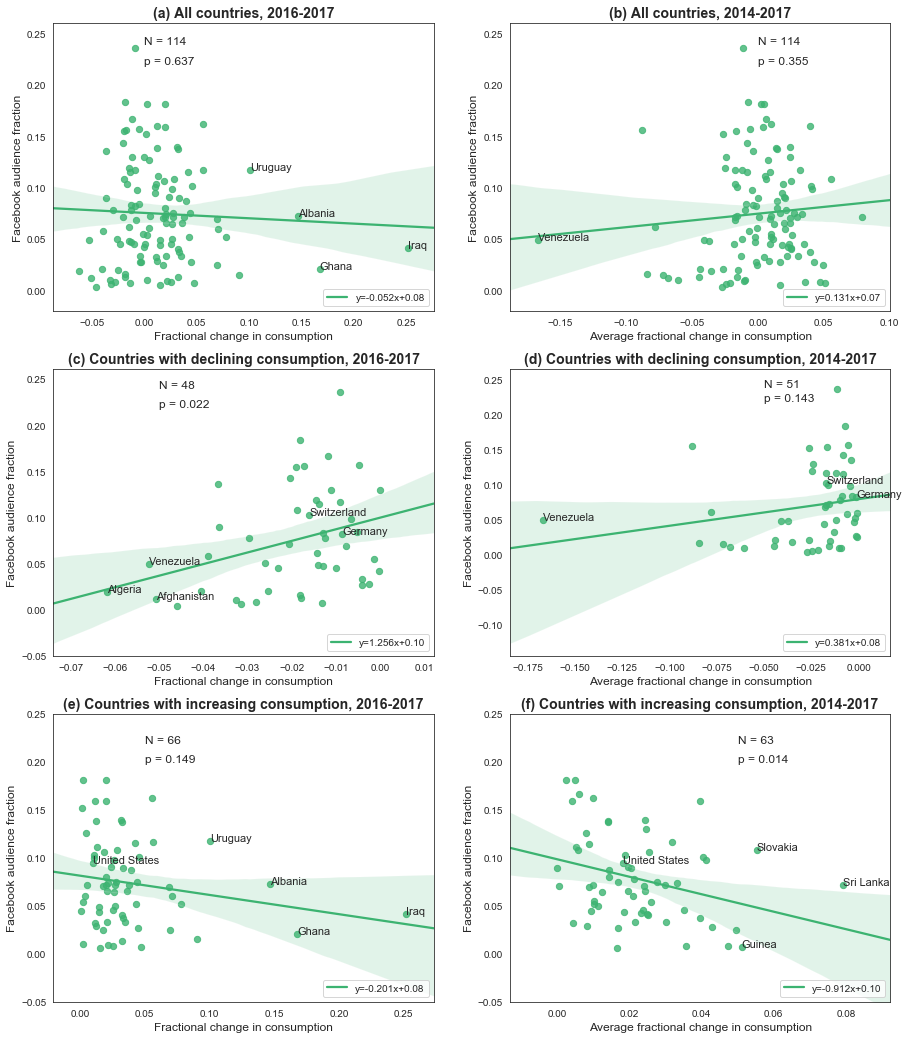

In [17]:
# all countries and countries where consumption declined 

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(18)
gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

# === a ===
df_plot = df_meat
slope, intercept, r_value, p_value, std_err = stats.linregress(df_plot["m_16_17"].values,
                                                               df_plot['FB_veg_fraction'].values
                                                              )
ax1 = sns.regplot(x="m_16_17", y="FB_veg_fraction", data=df_plot, ax=ax1, color='mediumseagreen',
                  line_kws={'label':"y={0:.3f}x+{1:.2f}".format(slope,intercept)},
                  scatter_kws={'s' : 40})

ax1.set_ylabel("Facebook audience fraction", fontsize=12)
ax1.set_xlabel("Fractional change in consumption", fontsize=12)
ax1.set_title("(a) All countries, 2016-2017", fontsize=14, weight='bold')
ax1.legend(loc='lower right')

n = df_plot.shape[0]
ax1.annotate("N = {0:.0f}".format(n), (0, 0.24), fontsize=12)
ax1.annotate("p = {0:.3f}".format(p_value), (0, 0.22), fontsize=12)

for index, row in df_plot.iterrows():
    if row["m_16_17"]>0.1  :
        x = row["m_16_17"]
        y = row['FB_veg_fraction']
        ax1.annotate(index, (x, y), fontsize=11)

# === b ===
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(df_plot['avg_d_meat'].values,
                                                               df_plot['FB_veg_fraction'].values
                                                              )
ax2 = sns.regplot(x='avg_d_meat', y="FB_veg_fraction", data=df_plot, ax=ax2, color='mediumseagreen',
                  line_kws={'label':"y={0:.3f}x+{1:.2f}".format(slope1,intercept1)},
                  scatter_kws={'s' : 40})

ax2.set_ylabel("Facebook audience fraction", fontsize=12)
ax2.set_xlabel("Average fractional change in consumption", fontsize=12)
ax2.set_title("(b) All countries, 2014-2017", fontsize=14, weight='bold')
ax2.legend(loc='lower right')
n = df_plot.shape[0]
ax2.annotate("N = {0:.0f}".format(n), (0, 0.24), fontsize=12)
ax2.annotate("p = {0:.3f}".format(p_value1), (0, 0.22), fontsize=12)

for index, row in df_plot.iterrows():
    if row['avg_d_meat']<-0.09  :
        x = row['avg_d_meat']
        y = row['FB_veg_fraction']
        ax2.annotate(index, (x, y), fontsize=11)

# === c ===
df_plot = df_meat[df_meat["m_16_17"]<=0]
print("c - ", df_plot.index)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(df_plot["m_16_17"].values,
                                                               df_plot['FB_veg_fraction'].values
                                                              )
ax3 = sns.regplot(x="m_16_17", y="FB_veg_fraction", data=df_plot, ax=ax3, color='mediumseagreen',
                  line_kws={'label':"y={0:.3f}x+{1:.2f}".format(slope2,intercept2)},
                  scatter_kws={'s' : 40})

ax3.set_ylabel("Facebook audience fraction", fontsize=12)
ax3.set_xlabel("Fractional change in consumption", fontsize=12)
ax3.set_title("(c) Countries with declining consumption, 2016-2017", fontsize=14, weight='bold')
ax3.legend(loc='lower right')
n = df_plot.shape[0]
ax3.annotate("N = {0:.0f}".format(n), (-0.05, 0.24), fontsize=12)
ax3.annotate("p = {0:.3f}".format(p_value2), (-0.05, 0.22), fontsize=12)

for index, row in df_plot.iterrows():
    if row["m_16_17"]<-0.05 or index in ['Germany', 'United States', 'Switzerland']:
        x = row["m_16_17"]
        y = row['FB_veg_fraction']
        ax3.annotate(index, (x, y), fontsize=11)


# === d ===
df_plot = df_meat[df_meat['avg_d_meat']<=0]
print("d - ", df_plot.index)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(df_plot['avg_d_meat'].values,
                                                               df_plot['FB_veg_fraction'].values
                                                              )
ax4 = sns.regplot(x='avg_d_meat', y="FB_veg_fraction", data=df_plot, ax=ax4, color='mediumseagreen',
                  line_kws={'label':"y={0:.3f}x+{1:.2f}".format(slope3,intercept3)},
                  scatter_kws={'s' : 40})

ax4.set_ylabel("Facebook audience fraction", fontsize=12)
ax4.set_xlabel("Average fractional change in consumption", fontsize=12)
ax4.set_title("(d) Countries with declining consumption, 2014-2017", fontsize=14, weight='bold')
ax4.legend(loc='lower right')
n = df_plot.shape[0]
ax4.annotate("N = {0:.0f}".format(n), (-0.05, 0.24), fontsize=12)
ax4.annotate("p = {0:.3f}".format(p_value3), (-0.05, 0.22), fontsize=12)

for index, row in df_plot.iterrows():
    if row['avg_d_meat']<-0.09  or index in ['Germany', 'United States', 'Switzerland']:
        x = row['avg_d_meat']
        y = row['FB_veg_fraction']
        ax4.annotate(index, (x, y), fontsize=11)

# === e ===
df_plot = df_meat[df_meat["m_16_17"]>0]
print("e - ", df_plot.index)
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(df_plot["m_16_17"].values,
                                                               df_plot['FB_veg_fraction'].values
                                                              )
ax5 = sns.regplot(x="m_16_17", y="FB_veg_fraction", data=df_plot, ax=ax5, color='mediumseagreen',
                  line_kws={'label':"y={0:.3f}x+{1:.2f}".format(slope4,intercept4)},
                  scatter_kws={'s' : 40})

ax5.set_ylabel("Facebook audience fraction", fontsize=12)
ax5.set_xlabel("Fractional change in consumption", fontsize=12)
ax5.set_title("(e) Countries with increasing consumption, 2016-2017", fontsize=14, weight='bold')
ax5.legend(loc='lower right')
n = df_plot.shape[0]
ax5.set_ylim([-0.05, 0.25])
ax5.annotate("N = {0:.0f}".format(n), (0.05, 0.22), fontsize=12)
ax5.annotate("p = {0:.3f}".format(p_value4), (0.05, 0.2), fontsize=12)

for index, row in df_plot.iterrows():
    if row["m_16_17"]>0.1 or index in ['Germany', 'United States', 'Switzerland']:
        x = row['m_16_17']
        y = row['FB_veg_fraction']
        ax5.annotate(index, (x, y), fontsize=11)

# === f ===
df_plot = df_meat[df_meat['avg_d_meat']>0]
print("f - ", df_plot.index)
slope5, intercept5, r_value5, p_value5, std_err5 = stats.linregress(df_plot['avg_d_meat'].values,
                                                               df_plot['FB_veg_fraction'].values
                                                              )
ax6 = sns.regplot(x='avg_d_meat', y="FB_veg_fraction", data=df_plot, ax=ax6, color='mediumseagreen',
                  line_kws={'label':"y={0:.3f}x+{1:.2f}".format(slope5,intercept5)},
                  scatter_kws={'s' : 40})

ax6.set_ylabel("Facebook audience fraction", fontsize=12)
ax6.set_xlabel("Average fractional change in consumption", fontsize=12)
ax6.set_title("(f) Countries with increasing consumption, 2014-2017", fontsize=14, weight='bold')
ax6.legend(loc='lower right')
n = df_plot.shape[0]
ax6.annotate("N = {0:.0f}".format(n), (0.05, 0.22), fontsize=12)
ax6.annotate("p = {0:.3f}".format(p_value5), (0.05, 0.2), fontsize=12)
ax6.set_ylim([-0.05, 0.25])
for index, row in df_plot.iterrows():
    if row["avg_d_meat"]>0.05 or index in ['Germany', 'United States', 'Switzerland'] :
        x = row['avg_d_meat']
        y = row['FB_veg_fraction']
        ax6.annotate(index, (x, y), fontsize=11)

plt.savefig(directory+"DeltaMeat_countries_revision.png", dpi=300, bbox_inches='tight')

plt.show()